<a href="https://colab.research.google.com/github/meghanaksr/Disease-Symptoms-and-Patient-Data/blob/main/Patient_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing libraries**

In [ ]:
!pip install lime
!pip install shap
!pip install lime shap scikit-learn matplotlib numpy pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.11.0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import lime
import lime.lime_tabular
import shap
warnings.filterwarnings('ignore')
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


**2.Data Transfer**

In [ ]:
df = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


**3.Exploratory Data Analysis**

**3.1.Distribution of symptoms**

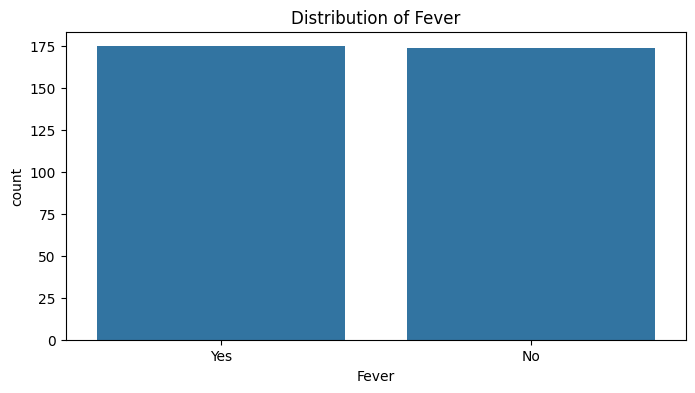

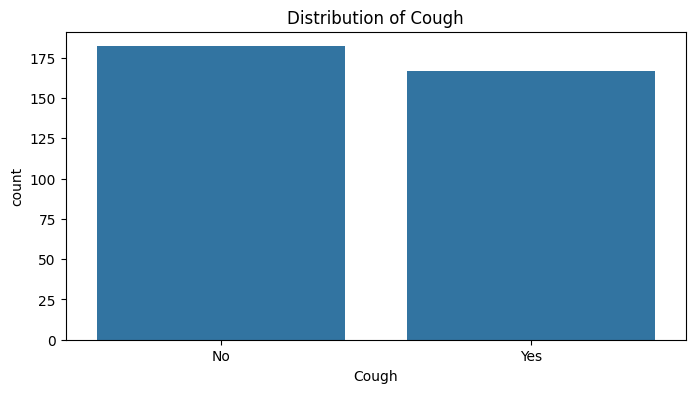

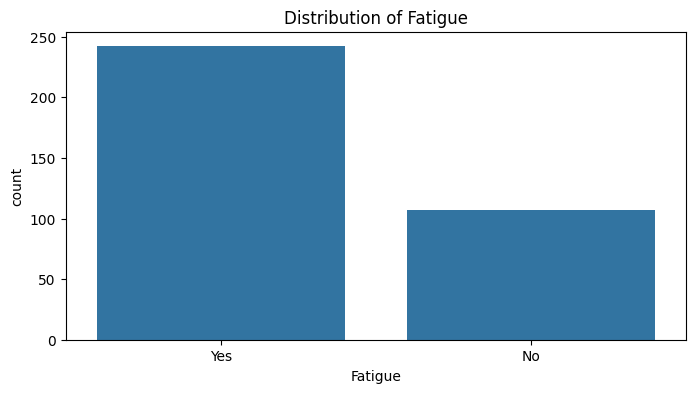

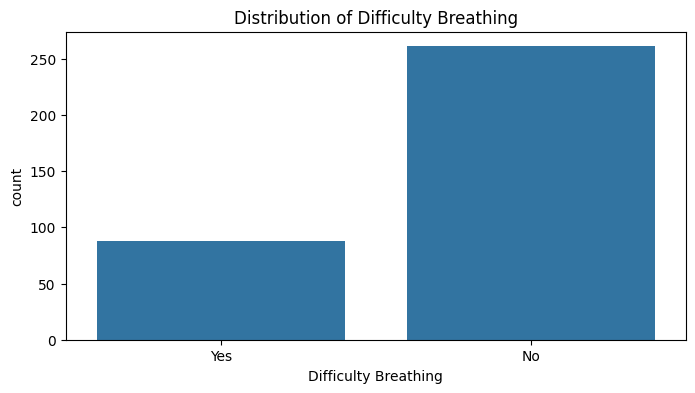

In [ ]:
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for symptom in symptoms:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=symptom)
    plt.title(f'Distribution of {symptom}')
    plt.show()

**3.2.Patient Demographics**

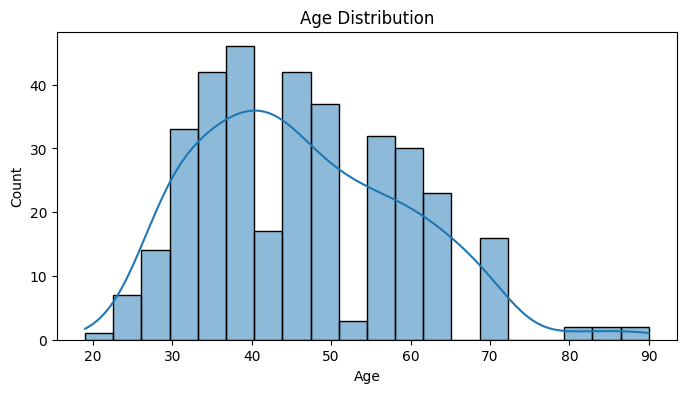

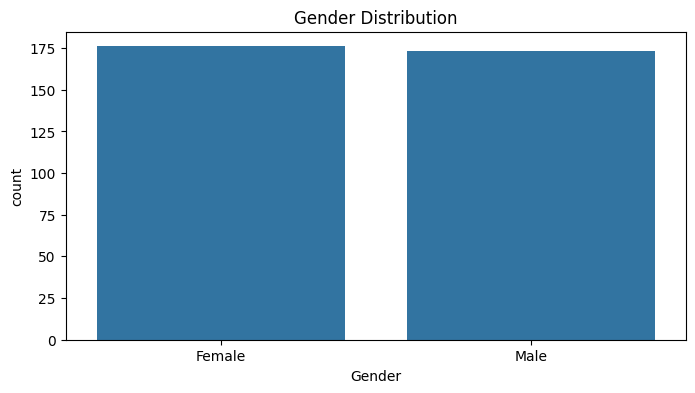

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

**4.Correlation Analysis**

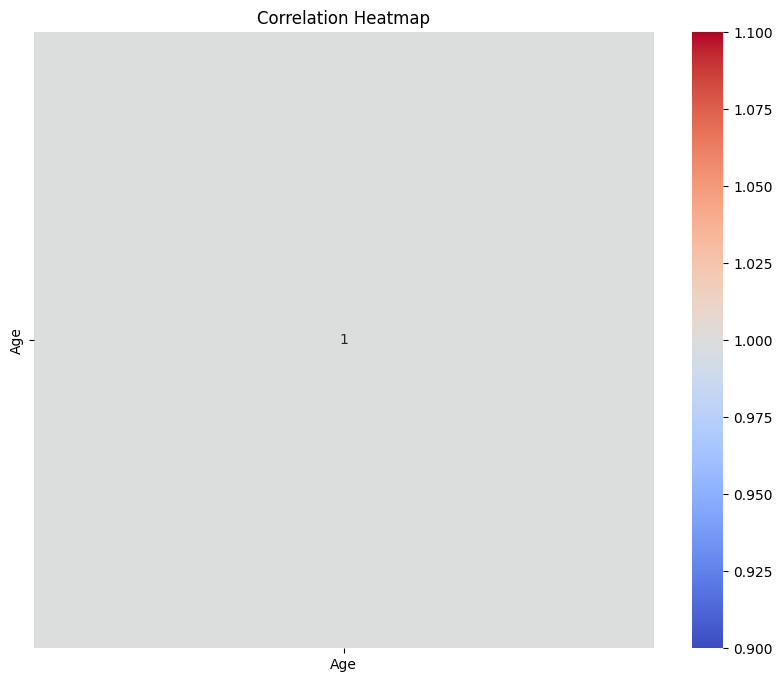

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**5.Predictive Modeling**

In [ ]:
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8428571428571429

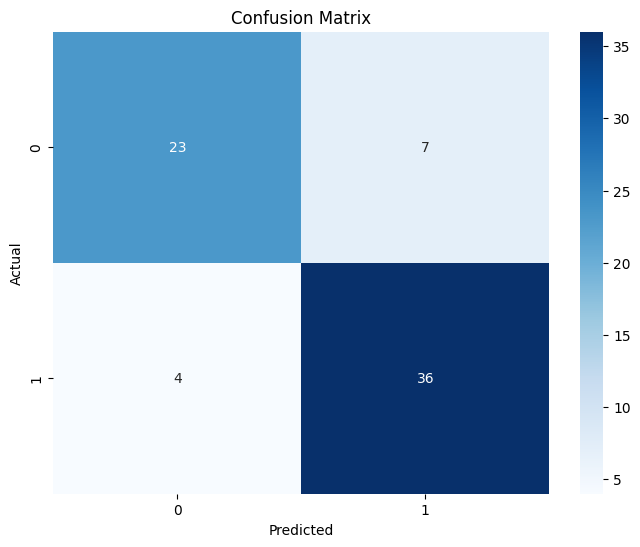

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

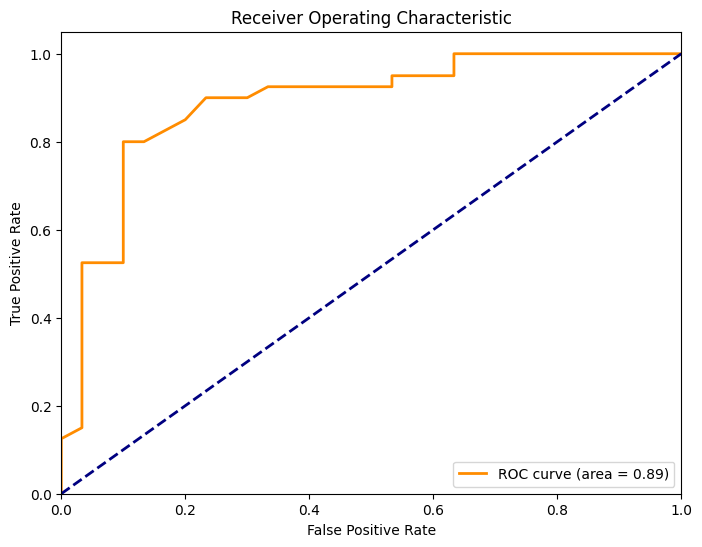

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


**Linear Regression**

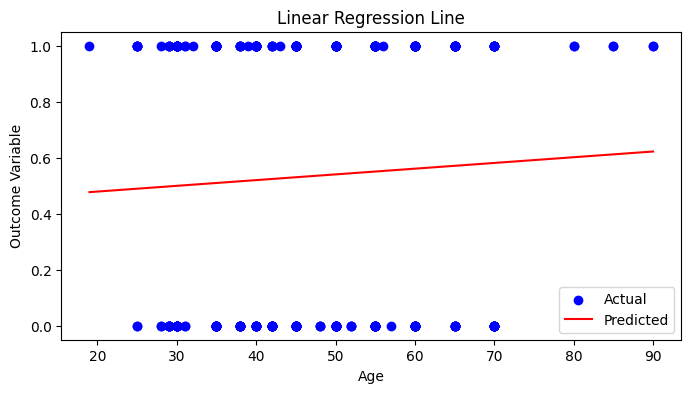

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
X_linear = df[['Age']]
y_linear = df['Outcome Variable']
le = LabelEncoder()
y_linear = le.fit_transform(y_linear)
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)
y_pred_linear = linear_model.predict(X_linear)
plt.figure(figsize=(8, 4))
plt.scatter(X_linear, y_linear, color='blue', label='Actual')
plt.plot(X_linear, y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression Line')
plt.xlabel('Age')
plt.ylabel('Outcome Variable')
plt.legend()
plt.show()

**Line Plot**

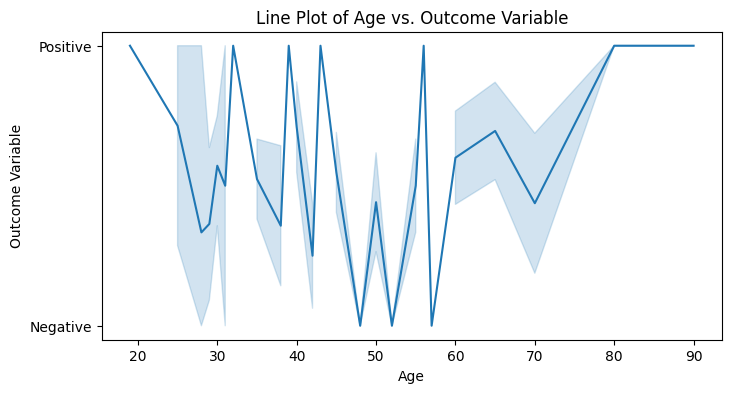

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Age', y='Outcome Variable')
plt.title('Line Plot of Age vs. Outcome Variable')
plt.xlabel('Age')
plt.ylabel('Outcome Variable')
plt.show()

**Decision Tree**

Decision Tree Accuracy: 0.60


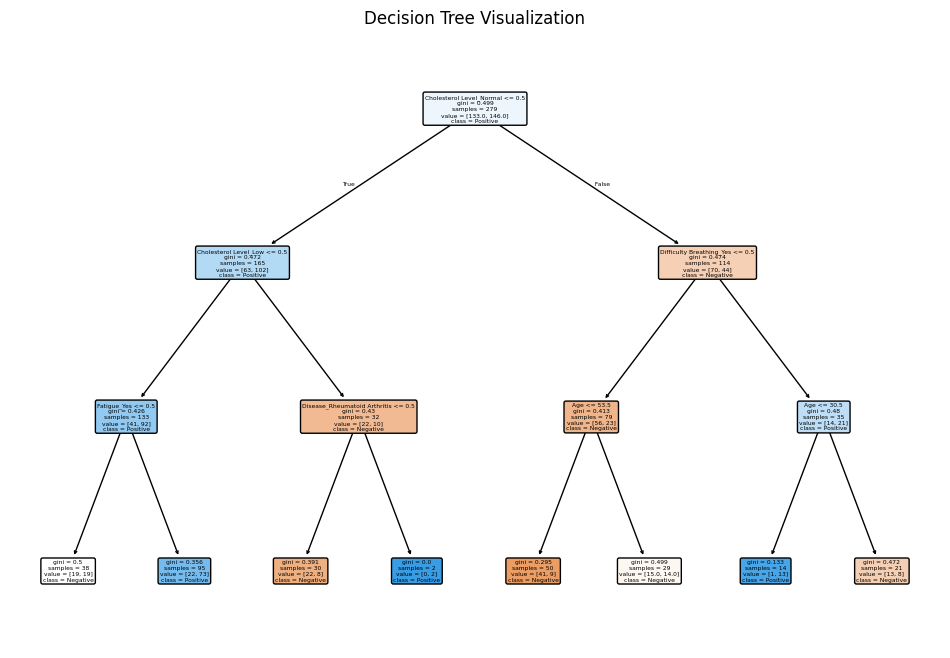

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


**Multiple Regression**

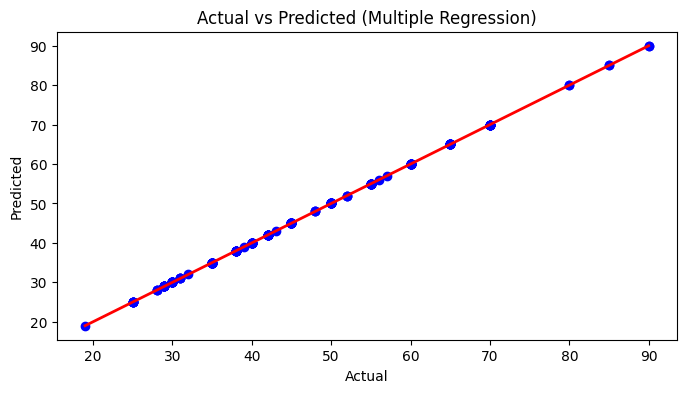

In [ ]:
from sklearn.linear_model import LinearRegression
X_multiple = numeric_df[['Age']]
y_multiple = numeric_df['Age']
multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y_multiple)
y_pred_multiple = multiple_model.predict(X_multiple)
plt.figure(figsize=(8, 4))
plt.scatter(y_multiple, y_pred_multiple, color='blue')
plt.plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], color='red', lw=2)
plt.title('Actual vs Predicted (Multiple Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Logistic Regression**

Logistic Regression Accuracy: 0.52


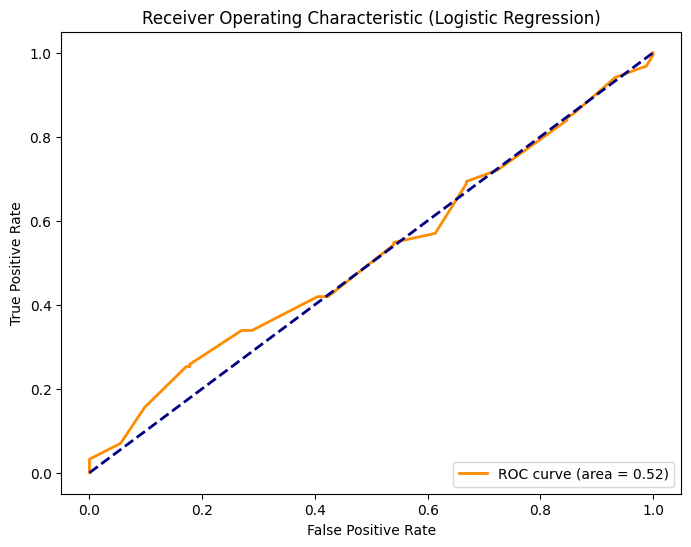

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
numeric_df = df.select_dtypes(include=[np.number])
X_logistic = numeric_df[['Age']]
y_logistic = df['Outcome Variable']
le = LabelEncoder()
y_logistic = le.fit_transform(y_logistic)
logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)
y_pred_logistic = logistic_model.predict(X_logistic)
accuracy_logistic = accuracy_score(y_logistic, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
y_prob_logistic = logistic_model.predict_proba(X_logistic)[:, 1]
fpr, tpr, _ = roc_curve(y_logistic, y_prob_logistic)
roc_auc_logistic = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


**LIME**

In [ ]:
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
X = df_encoded.drop(columns=["Outcome Variable"])
y = df_encoded["Outcome Variable"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Negative", "Positive"],
    mode="classification"
)
idx = 5
exp = explainer.explain_instance(X_test.values[idx], model.predict_proba)
exp.show_in_notebook()

**SHAP**

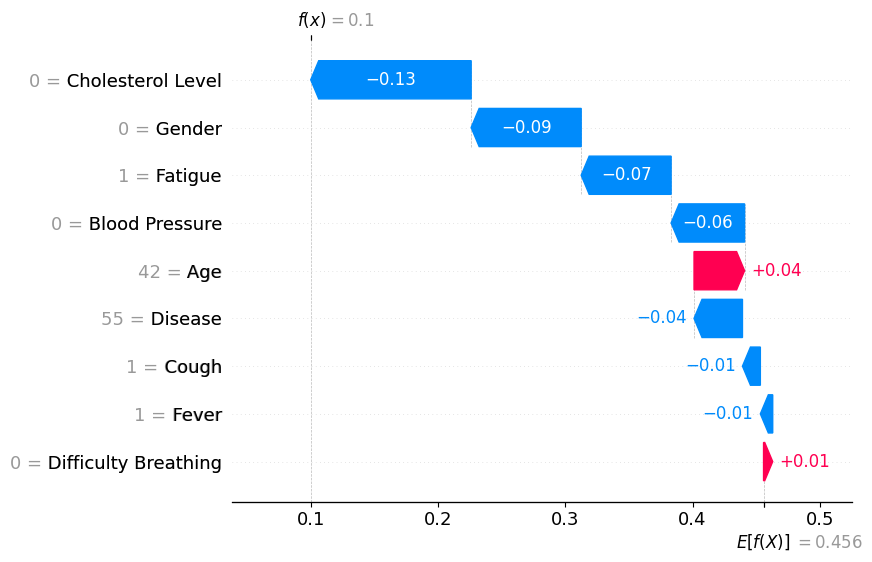

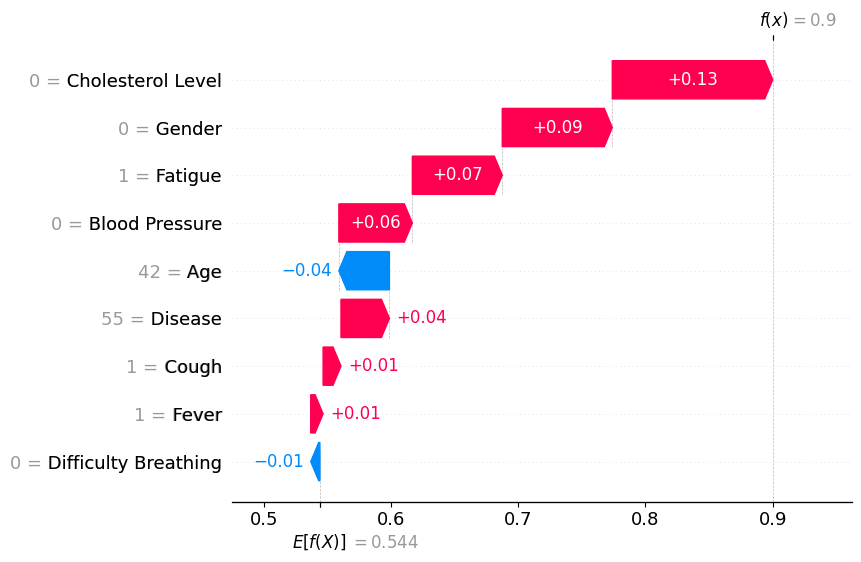

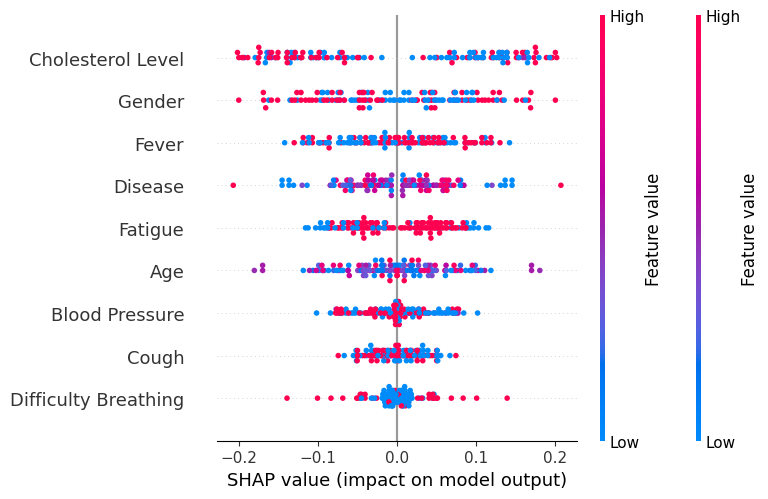

In [ ]:
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
X = df_encoded.drop(columns=["Outcome Variable"])
y = df_encoded["Outcome Variable"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
extra_cols = set(X_test.columns) - set(X_train.columns)
X_test = X_test.drop(columns=list(extra_cols))
X_test = X_test[X_train.columns]
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0, :, 0])
shap.plots.waterfall(shap_values[0, :, 1])
feature_names = list(X_test.columns)
shap_values_class_0 = shap_values.values[:, :, 0]
shap_values_class_1 = shap_values.values[:, :, 1]
shap.summary_plot(shap_values_class_0, X_test, feature_names=feature_names, show=False)
shap.summary_plot(shap_values_class_1, X_test, feature_names=feature_names, show=False)
plt.show()

**Balanced Dataset**

Original dataset shape: Counter({1: 186, 0: 163})
Resampled dataset shape: Counter({1: 186, 0: 186})


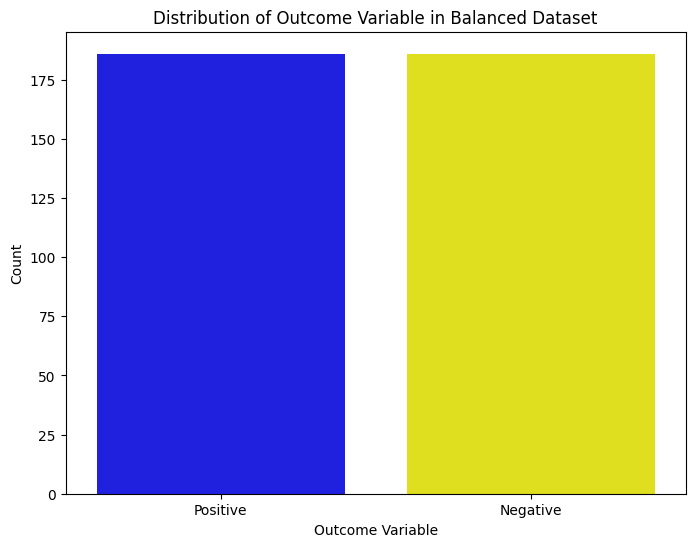

In [ ]:
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
X = df_encoded.drop(columns=['Outcome Variable'])
y = df_encoded['Outcome Variable']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Outcome Variable'] = y_resampled
outcome_counts = balanced_df['Outcome Variable'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=['blue', 'yellow'])
plt.title('Distribution of Outcome Variable in Balanced Dataset')
plt.xlabel('Outcome Variable')
plt.ylabel('Count')
plt.xticks(outcome_counts.index, ['Negative', 'Positive'])
plt.show()

**RandomForest Classifier**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = balanced_df.drop(columns=['Outcome Variable'])
y = balanced_df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7733333333333333
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        36
           1       0.78      0.79      0.78        39

    accuracy                           0.77        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.77      0.77      0.77        75

[[27  9]
 [ 8 31]]
